# Stats 315B Project

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set()

In [47]:
names = open('data/features.txt', 'r')
labels = names.readlines()
for i in range(len(labels)):
    labels[i] = labels[i][2:]
    labels[i] = labels[i][:-1]

data = pd.read_csv('data/train/X_train.txt', header=None, delim_whitespace=True, names=labels)

In [55]:
activity = pd.read_csv('data/train/y_train.txt', header=None, delim_whitespace=True, names = ["Activity"])

In [57]:
test_data = pd.read_csv('data/test/X_test.txt', header=None, delim_whitespace=True, names=labels)
test_act = pd.read_csv('data/test/y_test.txt', header=None, delim_whitespace=True, names = ["Activity"])

<AxesSubplot:xlabel='Activity', ylabel='count'>

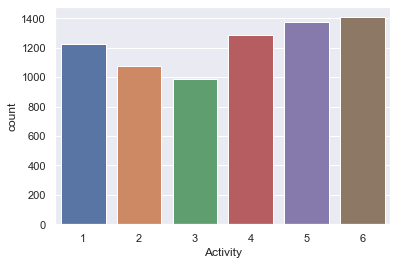

In [56]:
act_order = sorted(activity['Activity'].unique())

sns.countplot(x='Activity', data=activity, order = act_order)

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [61]:
decision_tree_model = DecisionTreeClassifier(max_depth=6,random_state=6)
decision_tree_model.fit(data,activity)

train_pred = decision_tree_model.predict(data)
test_pred = decision_tree_model.predict(test_data)

decision_train_accuracy = accuracy_score(activity,train_pred)
decision_validation_accuracy = accuracy_score(test_act,test_pred)

print(decision_train_accuracy)
print(decision_validation_accuracy)

0.9434167573449401
0.8554462164913471


In [62]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf_model = RandomForestClassifier(max_depth=9, random_state=6)
rf_model.fit(data,activity)

train_pred = rf_model.predict(data)
test_pred = rf_model.predict(test_data)

rf_train_acc = accuracy_score(activity,train_pred)
rf_test_acc = accuracy_score(test_act,test_pred)

print(rf_train_acc)
print(rf_test_acc)

C:\Users\shaan\AppData\Local\Temp\ipykernel_14180\3222559984.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(data,activity)


0.9982317736670294
0.9216152019002375


In [64]:
from sklearn.model_selection import GridSearchCV

hyperparameters = {
    "max_depth": [3,6,9,12,15,18,21,24,27]
}
est_tree = RandomForestClassifier()
est_tree.fit(data,activity)
search = GridSearchCV(est_tree,param_grid = hyperparameters, cv=6,return_train_score=True)
search.fit(data,activity)
search.best_params_

C:\Users\shaan\AppData\Local\Temp\ipykernel_14180\2890349902.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  est_tree.fit(data,activity)
C:\Users\shaan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\shaan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_t

{'max_depth': 9}